In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# data preprocessing
fill na: age(median)
drop: name, cabin, ticket number, passenger id
one hot encode: sex, embarked
normalise: remaining

## drop irrelevnt features

In [3]:
df.drop(columns=['Name', 'Cabin', 'Ticket', 'PassengerId'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## pipeline for numeric data

In [4]:
df_cat = df[['Sex', 'Embarked', 'Pclass']]
df_num = df.drop(columns=['Sex', 'Embarked', 'Survived', 'Pclass'])
y = df['Survived']

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pipeline_num = Pipeline([
    ('imputer', SimpleImputer(strategy='mean', missing_values=np.nan)),
    ('std_scalar', StandardScaler())
])

df_num_transformed = pipeline_num.fit_transform(df_num)
df_num_transformed = pd.DataFrame(df_num_transformed, columns=df_num.columns)
df_num_transformed

,Age,SibSp,Parch,Fare
0,-0.592481,0.432793,-0.473674,-0.502445
1,0.638789,0.432793,-0.473674,0.786845
2,-0.284663,-0.474545,-0.473674,-0.488854
3,0.407926,0.432793,-0.473674,0.420730
4,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...
886,-0.207709,-0.474545,-0.473674,-0.386671
887,-0.823344,-0.474545,-0.473674,-0.044381
888,0.000000,0.432793,2.008933,-0.176263
889,-0.284663,-0.474545,-0.473674,-0.044381


## encoding cataegorical data

In [6]:
from sklearn.preprocessing import OrdinalEncoder

oen = OrdinalEncoder()
df_cat_encoded = oen.fit_transform(df_cat)
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns=df_cat.columns)
df_cat_encoded

,Sex,Embarked,Pclass
0,1.0,2.0,2.0
1,0.0,0.0,0.0
2,0.0,2.0,2.0
3,0.0,2.0,0.0
4,1.0,2.0,2.0
...,...,...,...
886,1.0,2.0,1.0
887,0.0,2.0,0.0
888,0.0,2.0,2.0
889,1.0,0.0,0.0


## concatenate dataframes

In [7]:
df_transformed = pd.concat([df_num_transformed, df_cat_encoded, y], axis=1)
df_transformed

,Age,SibSp,Parch,Fare,Sex,Embarked,Pclass,Survived
0,-0.592481,0.432793,-0.473674,-0.502445,1.0,2.0,2.0,0
1,0.638789,0.432793,-0.473674,0.786845,0.0,0.0,0.0,1
2,-0.284663,-0.474545,-0.473674,-0.488854,0.0,2.0,2.0,1
3,0.407926,0.432793,-0.473674,0.420730,0.0,2.0,0.0,1
4,0.407926,-0.474545,-0.473674,-0.486337,1.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...
886,-0.207709,-0.474545,-0.473674,-0.386671,1.0,2.0,1.0,0
887,-0.823344,-0.474545,-0.473674,-0.044381,0.0,2.0,0.0,1
888,0.000000,0.432793,2.008933,-0.176263,0.0,2.0,2.0,0
889,-0.284663,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,1


In [8]:
df_transformed.dropna(axis=0, inplace=True)
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       889 non-null    float64
 1   SibSp     889 non-null    float64
 2   Parch     889 non-null    float64
 3   Fare      889 non-null    float64
 4   Sex       889 non-null    float64
 5   Embarked  889 non-null    float64
 6   Pclass    889 non-null    float64
 7   Survived  889 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 62.5 KB


# visualising data

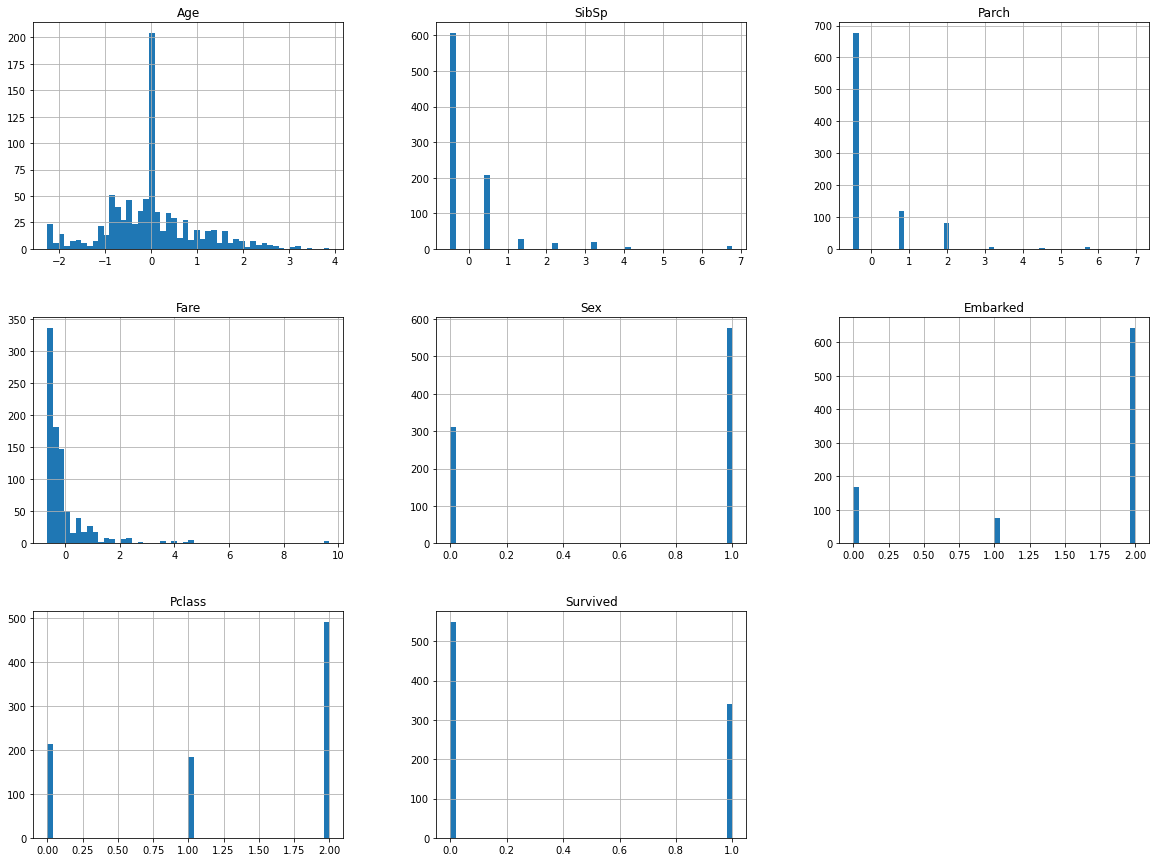

In [9]:
import matplotlib.pyplot as plt

df_transformed.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
corr_matrix = df_transformed.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.255290
Parch       0.083151
SibSp      -0.034040
Age        -0.074673
Embarked   -0.169718
Pclass     -0.335549
Sex        -0.541585
Name: Survived, dtype: float64

since no attribute has a significantly low correlation, all attributes remainsand will be dealt by regularisation

# stratified test/train split

In [11]:
from sklearn.model_selection import train_test_split
x = df_transformed

train, test = train_test_split(x,test_size=0.2, stratify=x['Survived'], random_state=42)

In [12]:
y_train = train['Survived']
x_train = train.drop('Survived', axis=1)
y_test = test['Survived']
x_test = test.drop('Survived', axis=1)

# evaluation function
metric = ROC AUC

In [13]:
def plot_roc_curve(y, y_pred):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import confusion_matrix

    print(confusion_matrix(y, y_pred))
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    print('ROCAUC: ' + str(roc_auc_score(y, y_pred)))

# build model
model 0: regularised logistic regression
model 1: SVM classifier
model 2: random forest
model 3: XGBoost

## model 0
baseline model

### find regularisation algorithm and penalty strength

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'penalty': ['l1', 'l2', 'elasticnet']}
]

lr = LogisticRegression()

grid_search = GridSearchCV(lr, param_grid, cv=5,
                           scoring='f1', return_train_score=True)
grid_search.fit(x_train, y_train)
grid_search.best_params_

/Users/briancheng/miniforge3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/briancheng/miniforge3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/briancheng/miniforge3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/briancheng/miniforge3/envs/tensorflo

{'penalty': 'l2'}

so, use ridge regression for model 0

In [15]:
param_grid = [
    {'C': [0.1* x for x in range(0,20)]}
]

grid_search = GridSearchCV(lr, param_grid, cv=5,
                           scoring='f1', return_train_score=True)
grid_search.fit(x_train, y_train)
grid_search.best_params_

/Users/briancheng/miniforge3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/briancheng/miniforge3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/briancheng/miniforge3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1589, in fit
    fold_coefs_ = Parallel(
  File "/Users/briancheng/miniforge3/envs/tensorflow/lib/python3.8/site-packages/joblib/

{'C': 1.0}

so, fit the model with ridge algorithm, C=1

[[97 13]
 [21 47]]
ROCAUC: 0.7864973262032086


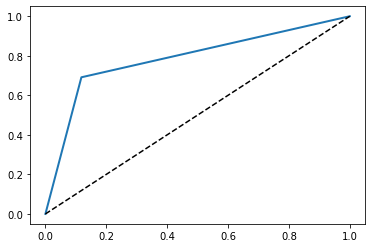

In [16]:
lr = LogisticRegression(penalty='l2', C=1)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

plot_roc_curve(y_test, y_pred)

## model 1
SVM classifier

### find which kernel and regularisation parameter to use

In [17]:
from sklearn.svm import SVC

param_grid = [
    {'C': [0.1* x for x in range(0,20)],
     'kernel': ['poly', 'rbf'],
     'degree': list(range(1,5))
     }
]

grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                           scoring='f1', return_train_score=True)
grid_search.fit(x_train, y_train)
grid_search.best_params_

/Users/briancheng/miniforge3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/briancheng/miniforge3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/briancheng/miniforge3/envs/tensorflow/lib/python3.8/site-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/briancheng/miniforge3/envs/tensorflow/lib/pyt

{'C': 1.1, 'degree': 1, 'kernel': 'rbf'}

[[99 11]
 [22 46]]
ROCAUC: 0.788235294117647


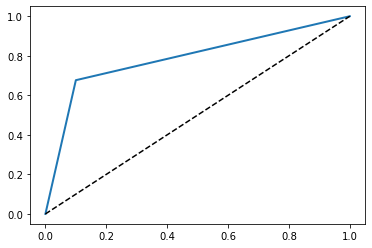

In [18]:
svc = SVC(kernel='rbf', C=1.1)

svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

plot_roc_curve(y_test, y_pred_svc)

slight improvement from the baseline model

## model 2
random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'n_estimators': list(range(480, 520)),
    'max_leaf_nodes': list(range(8, 14))}
]

grid_search = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid, cv=5,
                           scoring='f1', return_train_score=True)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'max_leaf_nodes': 12, 'n_estimators': 497}

[[104   6]
 [ 25  43]]
ROCAUC: 0.7889037433155079


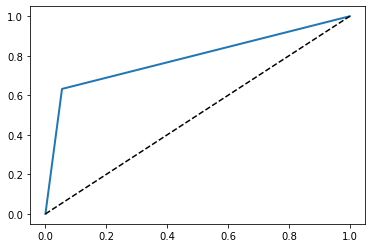

In [87]:
rfc = RandomForestClassifier(n_estimators=497, max_leaf_nodes=12, n_jobs=-1, random_state=42)
rfc.fit(x_train, y_train)

y_pred_rfc = rfc.predict(x_test)

plot_roc_curve(y_test, y_pred_rfc)

In [95]:
pd.Series(rfc.feature_names_in_, rfc.feature_importances_)

0.094574         Age
0.043111       SibSp
0.033652       Parch
0.180045        Fare
0.476800         Sex
0.033412    Embarked
0.138406      Pclass
dtype: object

###  random forest regularisation

In [127]:
from sklearn.metrics import zero_one_loss

def plot_learning_curves(model, x_train, y_train, x_test, y_test):
    train_errors, test_errors = [], []

    for m in range(1, len(x_train)):   # train model with increasing number of data
        model.fit(x_train[:m], y_train[:m])
        y_train_pred = model.predict(x_train[:m]) # training set pred
        y_test_pred = model.predict(x_test) # testing set pred
        train_errors.append(zero_one_loss(y_train[:m], y_train_pred)) # rmse of model trained with m data
        test_errors.append(zero_one_loss(y_test, y_test_pred)) # rmse of test data

    plt.plot(train_errors, 'r-+', linewidth=2, label='train')
    plt.plot(test_errors, 'b-', linewidth=3, label='test')


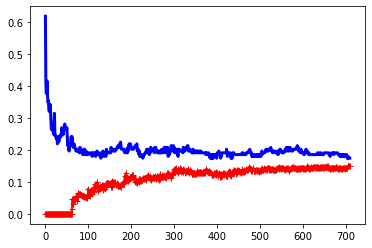

In [128]:
plot_learning_curves(rfc, x_train, y_train, x_test, y_test)

no signs of overfitting

### try drop the least important features

[[94 16]
 [35 33]]
ROCAUC: 0.6699197860962567


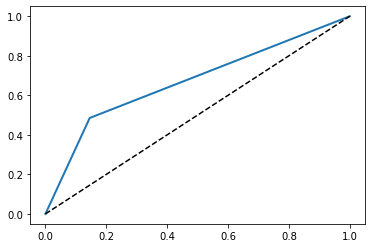

In [96]:
x_train_v2 =x_train.drop(columns=['Parch', 'Embarked'])
x_test_v2 = x_test.drop(columns=['Parch', 'Embarked'])

rfc_v2 = RandomForestClassifier(n_estimators=497, max_leaf_nodes=12, n_jobs=-1, random_state=42)
rfc_v2.fit(x_train_v2, y_train)

y_pred_v2 = rfc_v2.predict(x_test_v2)

plot_roc_curve(y_test, y_pred_rfc)

In [99]:
pd.Series(rfc_v2.feature_importances_, rfc_v2.feature_names_in_)

Age       0.110533
SibSp     0.044524
Fare      0.205544
Sex       0.502982
Pclass    0.136417
dtype: float64

much worse!

## model 3
XGBoost

In [110]:
import warnings
warnings.simplefilter(action='ignore')

from xgboost.sklearn import XGBClassifier

param_grid = [
    {'max_depth': list(range(1,8)),
    'n_estimators': list(range(1,8)),
     'learning_rate': list(0.1 * x for x in range(9, 20))}
]

grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False), param_grid, cv=5,
                           scoring='f1', return_train_score=True)
grid_search.fit(x_train, y_train)
grid_search.best_params_

[22:08:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:08:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:08:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:08:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

{'learning_rate': 0.9, 'max_depth': 7, 'n_estimators': 7}

[[88 22]
 [20 48]]
ROCAUC: 0.7529411764705883


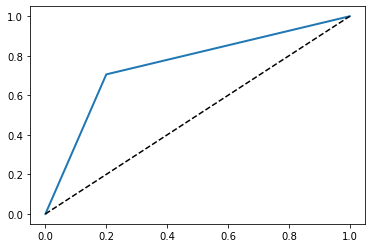

In [115]:
xgb = XGBClassifier(n_estimators=7, max_depth=7, learning_rate=0.9, random_state=42)
xgb.fit(x_train, y_train, eval_metric='aucpr', verbose=True)

y_pred_gb = xgb.predict(x_test)
plot_roc_curve(y_test, y_pred_gb)

# make predictions with random forest model

In [142]:
final = pd.read_csv('test.csv', index_col=0)
final.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [145]:
final.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True)

In [146]:
final_cat = final[['Sex', 'Embarked', 'Pclass']]
final_num = final.drop(columns=['Sex', 'Embarked', 'Pclass'])

In [147]:
final_num_transformed = pipeline_num.fit_transform(final_num)
final_num_transformed = pd.DataFrame(final_num_transformed, columns=final_num.columns)
final_num_transformed

,Age,SibSp,Parch,Fare
0,0.334993,-0.499470,-0.400248,-0.498407
1,1.325530,0.616992,-0.400248,-0.513274
2,2.514175,-0.499470,-0.400248,-0.465088
3,-0.259330,-0.499470,-0.400248,-0.483466
4,-0.655545,0.616992,0.619896,-0.418471
...,...,...,...,...
413,0.000000,-0.499470,-0.400248,-0.494448
414,0.691586,-0.499470,-0.400248,1.313753
415,0.651965,-0.499470,-0.400248,-0.508792
416,0.000000,-0.499470,-0.400248,-0.494448


## encoding cataegorical data

In [148]:
final_cat_encoded = oen.fit_transform(final_cat)
final_cat_encoded = pd.DataFrame(final_cat_encoded, columns=final_cat.columns)
final_cat_encoded

,Sex,Embarked,Pclass
0,1.0,1.0,2.0
1,0.0,2.0,2.0
2,1.0,1.0,1.0
3,1.0,2.0,2.0
4,0.0,2.0,2.0
...,...,...,...
413,1.0,2.0,2.0
414,0.0,0.0,0.0
415,1.0,2.0,2.0
416,1.0,2.0,2.0


## concatenate dataframes

In [150]:
final_transformed = pd.concat([final_num_transformed, final_cat_encoded], axis=1)
final_transformed

,Age,SibSp,Parch,Fare,Sex,Embarked,Pclass
0,0.334993,-0.499470,-0.400248,-0.498407,1.0,1.0,2.0
1,1.325530,0.616992,-0.400248,-0.513274,0.0,2.0,2.0
2,2.514175,-0.499470,-0.400248,-0.465088,1.0,1.0,1.0
3,-0.259330,-0.499470,-0.400248,-0.483466,1.0,2.0,2.0
4,-0.655545,0.616992,0.619896,-0.418471,0.0,2.0,2.0
...,...,...,...,...,...,...,...
413,0.000000,-0.499470,-0.400248,-0.494448,1.0,2.0,2.0
414,0.691586,-0.499470,-0.400248,1.313753,0.0,0.0,0.0
415,0.651965,-0.499470,-0.400248,-0.508792,1.0,2.0,2.0
416,0.000000,-0.499470,-0.400248,-0.494448,1.0,2.0,2.0


In [151]:
final_pred = rfc.predict(final_transformed)

In [162]:
result = pd.DataFrame({'Survived':final_pred}, index=final.index)
result.to_csv('result.csv')